In [2]:
from os.path import join as pathjoin
from data_processing import *
from interpretation import *
from models import *
from training import *

In [3]:
DATA_DIR = '/home/mlepekhin/data/min_gpt_bpe'
MODELS_DIR = '/home/mlepekhin/models'
MODEL_ID = 'allennlp_rubert'
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

In [4]:
transformer_model = 'DeepPavlov/rubert-base-cased'
MAX_TOKENS = 512

### Loading of the pretrained model

In [5]:
vocab = Vocabulary().from_files(pathjoin(MODELS_DIR, MODEL_ID, 'vocab'))
model = build_transformer_model(vocab, transformer_model)

Building the model


In [6]:
id_to_label = vocab.get_index_to_token_vocabulary('labels')
print(id_to_label)
print(id_to_label.values())

{0: 'A8', 1: 'A12', 2: 'A1', 3: 'A14', 4: 'A11', 5: 'A17', 6: 'A16', 7: 'A4', 8: 'A9', 9: 'A7'}
dict_values(['A8', 'A12', 'A1', 'A14', 'A11', 'A17', 'A16', 'A4', 'A9', 'A7'])


In [7]:
if torch.cuda.is_available():
    cuda_device = 1
else:
    cuda_device = -1
print(cuda_device)
model.load_state_dict(torch.load(BEST_MODEL, map_location=f'cuda:{cuda_device}'))

1


<All keys matched successfully>

### Data loading

In [8]:
ru_test_df = pd.read_csv(pathjoin(DATA_DIR, 'ru'))
ru_test_df.head()

,Unnamed: 0,target,text
0,0,A4,"села на улице могильщиков . "" бедныи атос ! - ..."
1,1,A4,##елкать . если бы они могли забыть . когда - ...
2,2,A4,"воскресыи в уши . и вот тебе , моя нем не скаж..."
3,3,A4,"отчаянном гостиниц и потертои , старыи бурнуще..."
4,4,A4,"ожил в него . - - вы говорите , - сказал он ид..."


In [9]:
true_classes = ru_test_df.target.values
sentences = ru_test_df.text.values

### Preliminary analysis

In [10]:
dataset_reader = build_transformer_dataset_reader(transformer_model, MAX_TOKENS)
predictor = TextClassifierPredictor(model, dataset_reader=dataset_reader)
predicted_classes = np.array(predict_classes(sentences, predictor, vocab))

In [11]:
print(type(predicted_classes == 'A1'))https://janakiev.com/blog/jupyter-virtual-envs/https://janakiev.com/blog/jupyter-virtual-envs/

<class 'numpy.ndarray'>


In [12]:
print(len(np.unique(true_classes)))

10


In [13]:
calc_classifier_metrics(predicted_classes, true_classes)

label (argum) f1_score 0.631578947368421 precision 0.9 recall 0.4864864864864865
label (fictive) f1_score 0.975609756097561 precision 1.0 recall 0.9523809523809523
label (instruct) f1_score 0.888888888888889 precision 0.8 recall 1.0
label (reporting) f1_score 0.8444444444444444 precision 0.95 recall 0.76
label (legal) f1_score 0.9047619047619048 precision 0.95 recall 0.8636363636363636
label (personal) f1_score 0.5714285714285715 precision 0.4 recall 1.0
label (commercial) f1_score 0.85 precision 0.85 recall 0.85
label (research) f1_score 0.8108108108108107 precision 0.75 recall 0.8823529411764706
label (info) f1_score 0.6666666666666666 precision 0.5 recall 1.0
label (eval) f1_score 0.9090909090909091 precision 1.0 recall 0.8333333333333334
accuracy 0.81


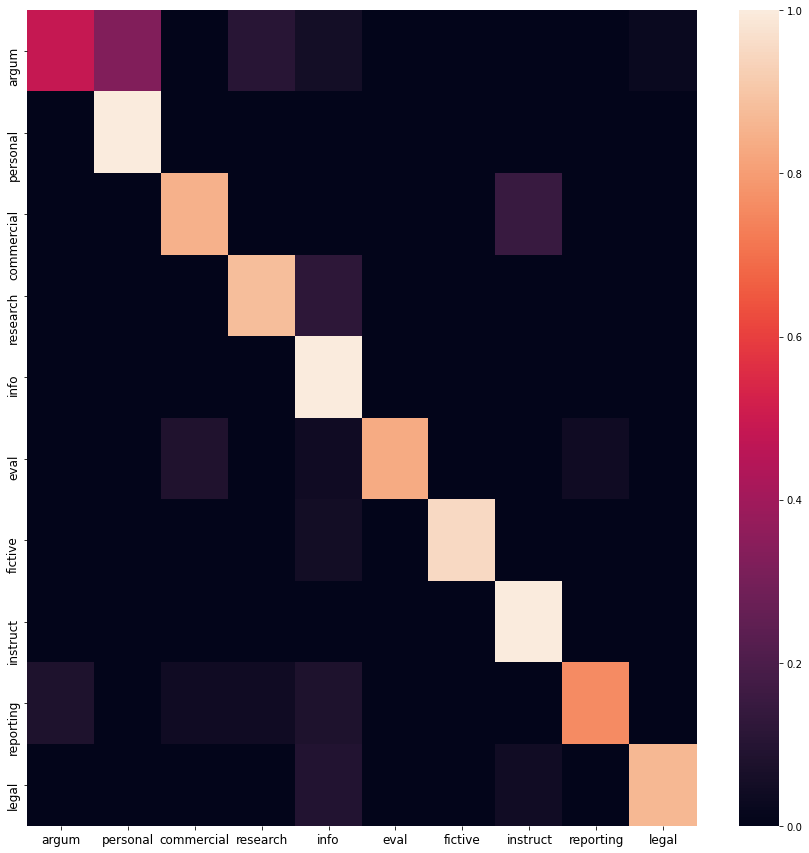

In [14]:
plot_confusion_matrix(predicted_classes, true_classes)

### Saliency Gradient Interpretation

In [15]:
smooth_grad = SmoothGradient(predictor)
simple_grad = SimpleGradient(predictor)
integrated_grad = IntegratedGradient(predictor)

In [16]:
mistake_ids = []

for sent_id in range(len(true_classes)):
    if true_classes[sent_id] != predicted_classes[sent_id]:
        mistake_ids.append(sent_id)

In [17]:
interpret_sentence(
    sentences[mistake_ids[0]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[0]]],
    label_description[predicted_classes[mistake_ids[0]]]
)

TRUE LABEL: instruct
LABEL: commercial
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
соответствия уровня вашего сертификата . искры могут вызвать взрыв или пожар , котор ##ы ##и приведут к серьезно ##му ранен ##ию или даже смерти . участки с взрывоопас ##но ##и атмосфер ##ои обычно ( но не всегда ) явно обозначены . взрывоопас ##ными являются следующие среды : заправ ##очные станции ( например , бенз ##около ##нки ) ; пространство под палуб ##ои на кораблях ; оборудование для транспортировки и склады топлива и химических веществ ; транспортные средства , работающие на сжиж ##енном нефтяном газе ( например , проп ##ане или бут ##ане ) ; атмосфера , содержащая химические вещества или частицы ( например , песч ##инки , пыль или металл ##ически ##и порошок ) и любые другие места , где обычно рекомендуется выключ ##ать двигатель автомобиля . использование разъ ##емов и портов . не пыта ##итесь ввести разъ ##емы в порты с применением силы . провер ##

In [18]:
interpret_sentence(
    sentences[mistake_ids[1]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[1]]],
    label_description[predicted_classes[mistake_ids[1]]]
)

TRUE LABEL: instruct
LABEL: commercial
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
основных контактов , таких как версия wi ##nd ##ows mo ##bi ##le ##® и тип процессора , используемого в коммуника ##торе . также позволяет указать имя коммуника ##тора . автоматическая регулиров ##ка громкости уровень громкости вашего голоса при записи будет регулировать ##ся автоматически . сертификаты просмотр свед ##ении о сертификата ##х , установленных в коммуника ##торе . очистить хранилище сброс установок коммуника ##тора и восстановление в нем стандартных заводских настроек . часы и сигналы установка часов коммуника ##тора на дату и время текущего часового пояса или второго часового пояса во время путешествия . можно также установить сигналы на определенные дни недели и моменты времени . управление устро ##ист ##вом 249 значок описание обратная связь возможность автомат ##ическо ##и отправки коммуника ##тором свед ##ении о том , как вы использует ##е wi

In [19]:
interpret_sentence(
    sentences[mistake_ids[2]], dataset_reader.tokenizer, 50, 
    [smooth_grad, simple_grad, integrated_grad],
    label_description[true_classes[mistake_ids[2]]],
    label_description[predicted_classes[mistake_ids[2]]]
)

TRUE LABEL: instruct
LABEL: legal
<class 'allennlp.interpret.saliency_interpreters.smooth_gradient.SmoothGradient'> TEXT:
дистанционного зондирования земли с борта воздушного земли " в порядке , установленном правительством росс ##ии ##ско ##и федерации " . однако , о самих этих правилах ничего не известно . есть основания полагать , что они просто не утверждены , а значит , нарушить их невозможно . вдобавок , обычная съем ##ка не является " дистанц ##ионным зонд ##ированием земли " , под данным понятием традиционно понимается аэ ##ро - и спутников ##ая фотос ##ъем ##ка зем ##но ##и поверхности с помощью специально ##и аппаратуры . се ##ичас эта деятельность регулируется пунктом 10 . 3 " наставления по производству полетов в гражданско ##и авиации н ##пп га - 85 " . то , что описано в нем , не имеет ничего общего с любитель ##ско ##и фотос ##ъем ##ко ##и из окна самолета . в существующих федеральных авиационных правилах " общие правила воздушных перевозок пассажиров , багажа , грузов и